## Predicting Terrorism / Bayesian Inference
### summary
The aim of this project is to investigate some aspects of the Global Terrorism Database (GTD) with focusing on middle east region and ‘Bombing/Explosion’ terror attacks. Using Bayesian approach, it was concluded that the distributions for the number of attacks in “West Bank Gaza Strip” and “Lebanon” do not significantly differ during years of 2000-2015. In order to predict the number of bombing attacks in 1993 in Lebanon which is missing from the data, Bayesian Regression was employed. The linear regression between the year and number of bombing attacks resulted in prediction of 34 bombing attacks in 1993 in Lebanon which is very close to the average of bombing attacks in Lebanon between 1970-2015.

### Introduction
The Global Terrorism Database was put together and is maintained by National Consortium for the Study of Terrorism and Responses to Terrorism (START). More than 150,000 terrorist incidents are recorded around the world from 1970 to 2015. The code book that comes with the data base explains the variables and information accompanying each incident. 137 variables describe information about time, type, location, motive and the number of people involved in each incident among many others. Unfortunately, the data for the year of 1993 is lost. Some exploratory analyses were done which is shown the trends in terror attacks.



In [1]:
# Importing the required packages
import pandas as pd
import pymc3 as pm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pydot
from scipy.stats import poisson
import theano.tensor as tt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Couldn't import dot_parser, loading of dot files will not be possible.


In [ ]:
# Three excel file contains data for different years. 

In [2]:
#Reading the data from 1970-1991
data1 =pd.read_excel('~/Documents/DataScience/GTD_0616dist/gtd_70to91_0616dist.xlsx')

In [3]:
#Reading the data from 1992-2011
data2 =pd.read_excel('~/Documents/DataScience/GTD_0616dist/gtd_92to11_0616dist.xlsx')

In [4]:
#Reading the data from 2012-2015
data3 =pd.read_excel('~/Documents/DataScience/GTD_0616dist/gtd_12to15_0616dist.xlsx')

In [5]:
# Putting all the data in one dataframe
data= pd.concat([data1, data2,data3])

In [44]:
# 156772 entries with 137 variable stored in the final dataframe
data.shape

(156772, 137)

In [31]:
# Investigating the number of regions included in the dataset
data1.region_txt.unique()

array([u'Central America & Caribbean', u'North America', u'Southeast Asia',
       u'Western Europe', u'East Asia', u'South America',
       u'Eastern Europe', u'Sub-Saharan Africa',
       u'Middle East & North Africa', u'Australasia & Oceania',
       u'South Asia', u'Central Asia'], dtype=object)

In [32]:
#Looking at categories of terror attackes 
data1.attacktype1_txt.unique()


array([u'Assassination', u'Hostage Taking (Kidnapping)',
       u'Bombing/Explosion', u'Facility/Infrastructure Attack',
       u'Armed Assault', u'Hijacking', u'Unknown', u'Unarmed Assault',
       u'Hostage Taking (Barricade Incident)'], dtype=object)

In [6]:
#Creating a new dataframe called region which contains the number of terror attacks of type 1 in each region
region = data.groupby('region_txt', as_index= False).attacktype1_txt.count().sort_values('attacktype1_txt', ascending =False)

In [7]:
#Creating a new dataframe called killed which contains the number of people killed in each region

killed = data.groupby('region_txt', as_index= False).nkill.sum().sort_values('nkill', ascending =False)

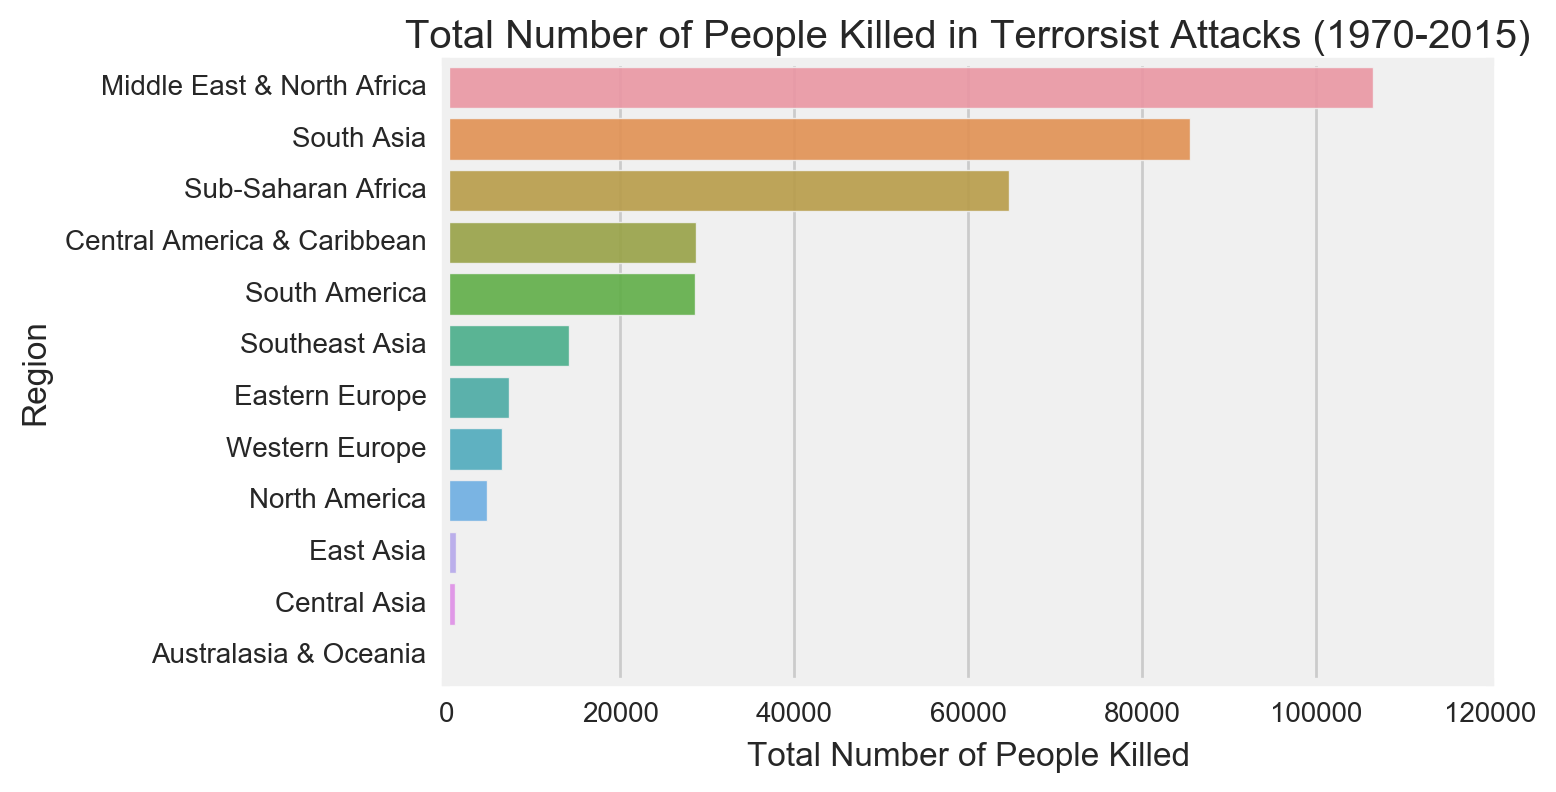

In [9]:
# Plotting the total number of people killed in terrorsist attacks (1970-2015) by region
kill = killed['nkill']

Category = killed['region_txt']
ax = sns.barplot(x= kill, y= Category, alpha = 0.9)
ax.set_yticklabels(labels = Category)
plt.xlabel('Total Number of People Killed')
plt.ylabel('Region')
plt.title('Total Number of People Killed in Terrorsist Attacks (1970-2015)')
plt.savefig('kill.png')
plt.show()

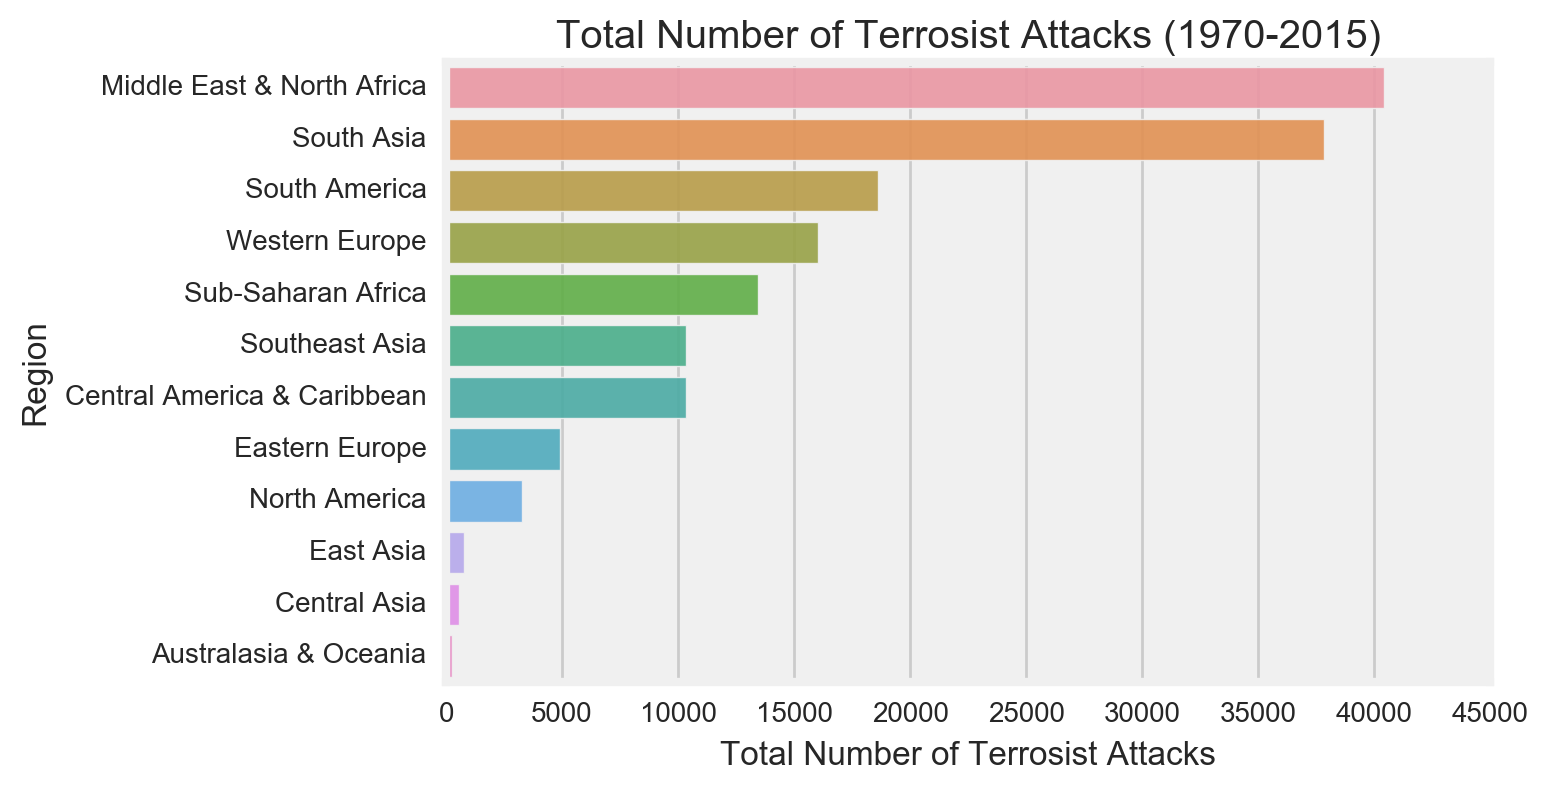

In [10]:
# Plotting the total number of terrorsist attacks (1970-2015) by region

attack = region['attacktype1_txt']
Category = region['region_txt']
ax = sns.barplot(x= attack, y= Category, alpha = 0.9)
ax.set_yticklabels(labels = Category)
plt.xlabel('Total Number of Terrosist Attacks')
plt.ylabel('Region')
plt.title('Total Number of Terrosist Attacks (1970-2015)')
plt.savefig('region.png')
plt.show()

In [76]:
#Creating a new dataframe called attack which contains the number of terror attacks based on type of the attack 
attack=data.attacktype1_txt.value_counts()
attack

Bombing/Explosion                      75963
Armed Assault                          37554
Assassination                          17582
Hostage Taking (Kidnapping)             9115
Facility/Infrastructure Attack          8849
Unknown                                 5490
Hostage Taking (Barricade Incident)      835
Unarmed Assault                          828
Hijacking                                556
Name: attacktype1_txt, dtype: int64

In [63]:
attack.index

Index([u'Bombing/Explosion', u'Armed Assault', u'Assassination',
       u'Hostage Taking (Kidnapping)', u'Facility/Infrastructure Attack',
       u'Unknown', u'Hostage Taking (Barricade Incident)', u'Unarmed Assault',
       u'Hijacking'],
      dtype='object')

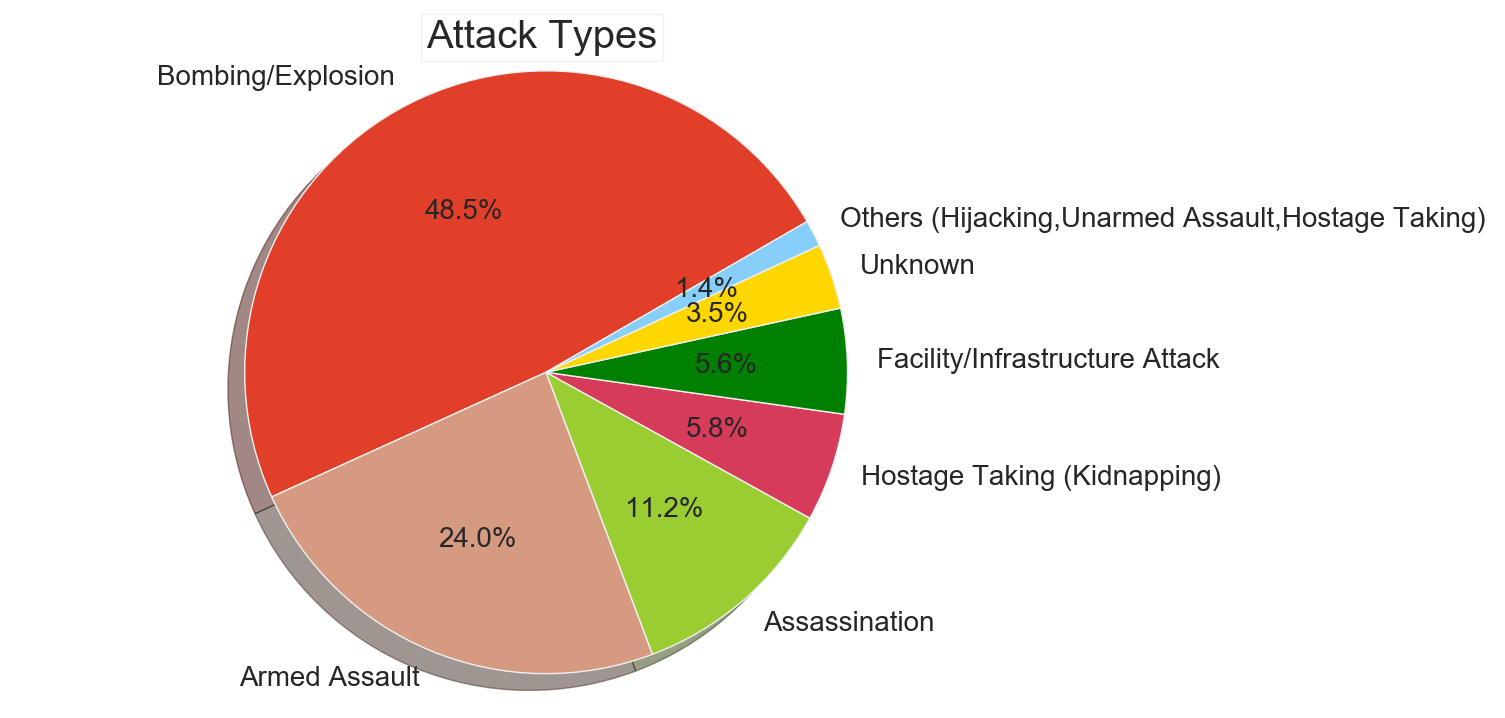

In [11]:
# Plotting a pie chart showing the percentage share of  each terrorsist attack type 

labels = [u'Bombing/Explosion', u'Armed Assault', u'Assassination',
       u'Hostage Taking (Kidnapping)', u'Facility/Infrastructure Attack',
       u'Unknown',
       u'Others (Hijacking,Unarmed Assault,Hostage Taking)']
sizes = [75963,37554,17582,9115,8849,5490,2219]
explode = (0, 0, 0, 0,0,0,0,0)  # only "explode" 
colors = ["#E13F29", "#D69A80", 'yellowgreen',"#D63B59",  'green', 'gold', 'lightskyblue', 'lightcoral']

fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=30,colors =colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Attack Types', bbox={'facecolor':'1.0', 'pad':2})

plt.show()

In [116]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,0,0,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [12]:
# This is to calculate the number of attacks in each region over the years
time =data.groupby(['region_txt','iyear'], as_index = False).attacktype1_txt.count()

In [13]:
# This is to calculate the total number of attacks over the years
time2 =data.groupby(['iyear'], as_index = False).attacktype1_txt.count()

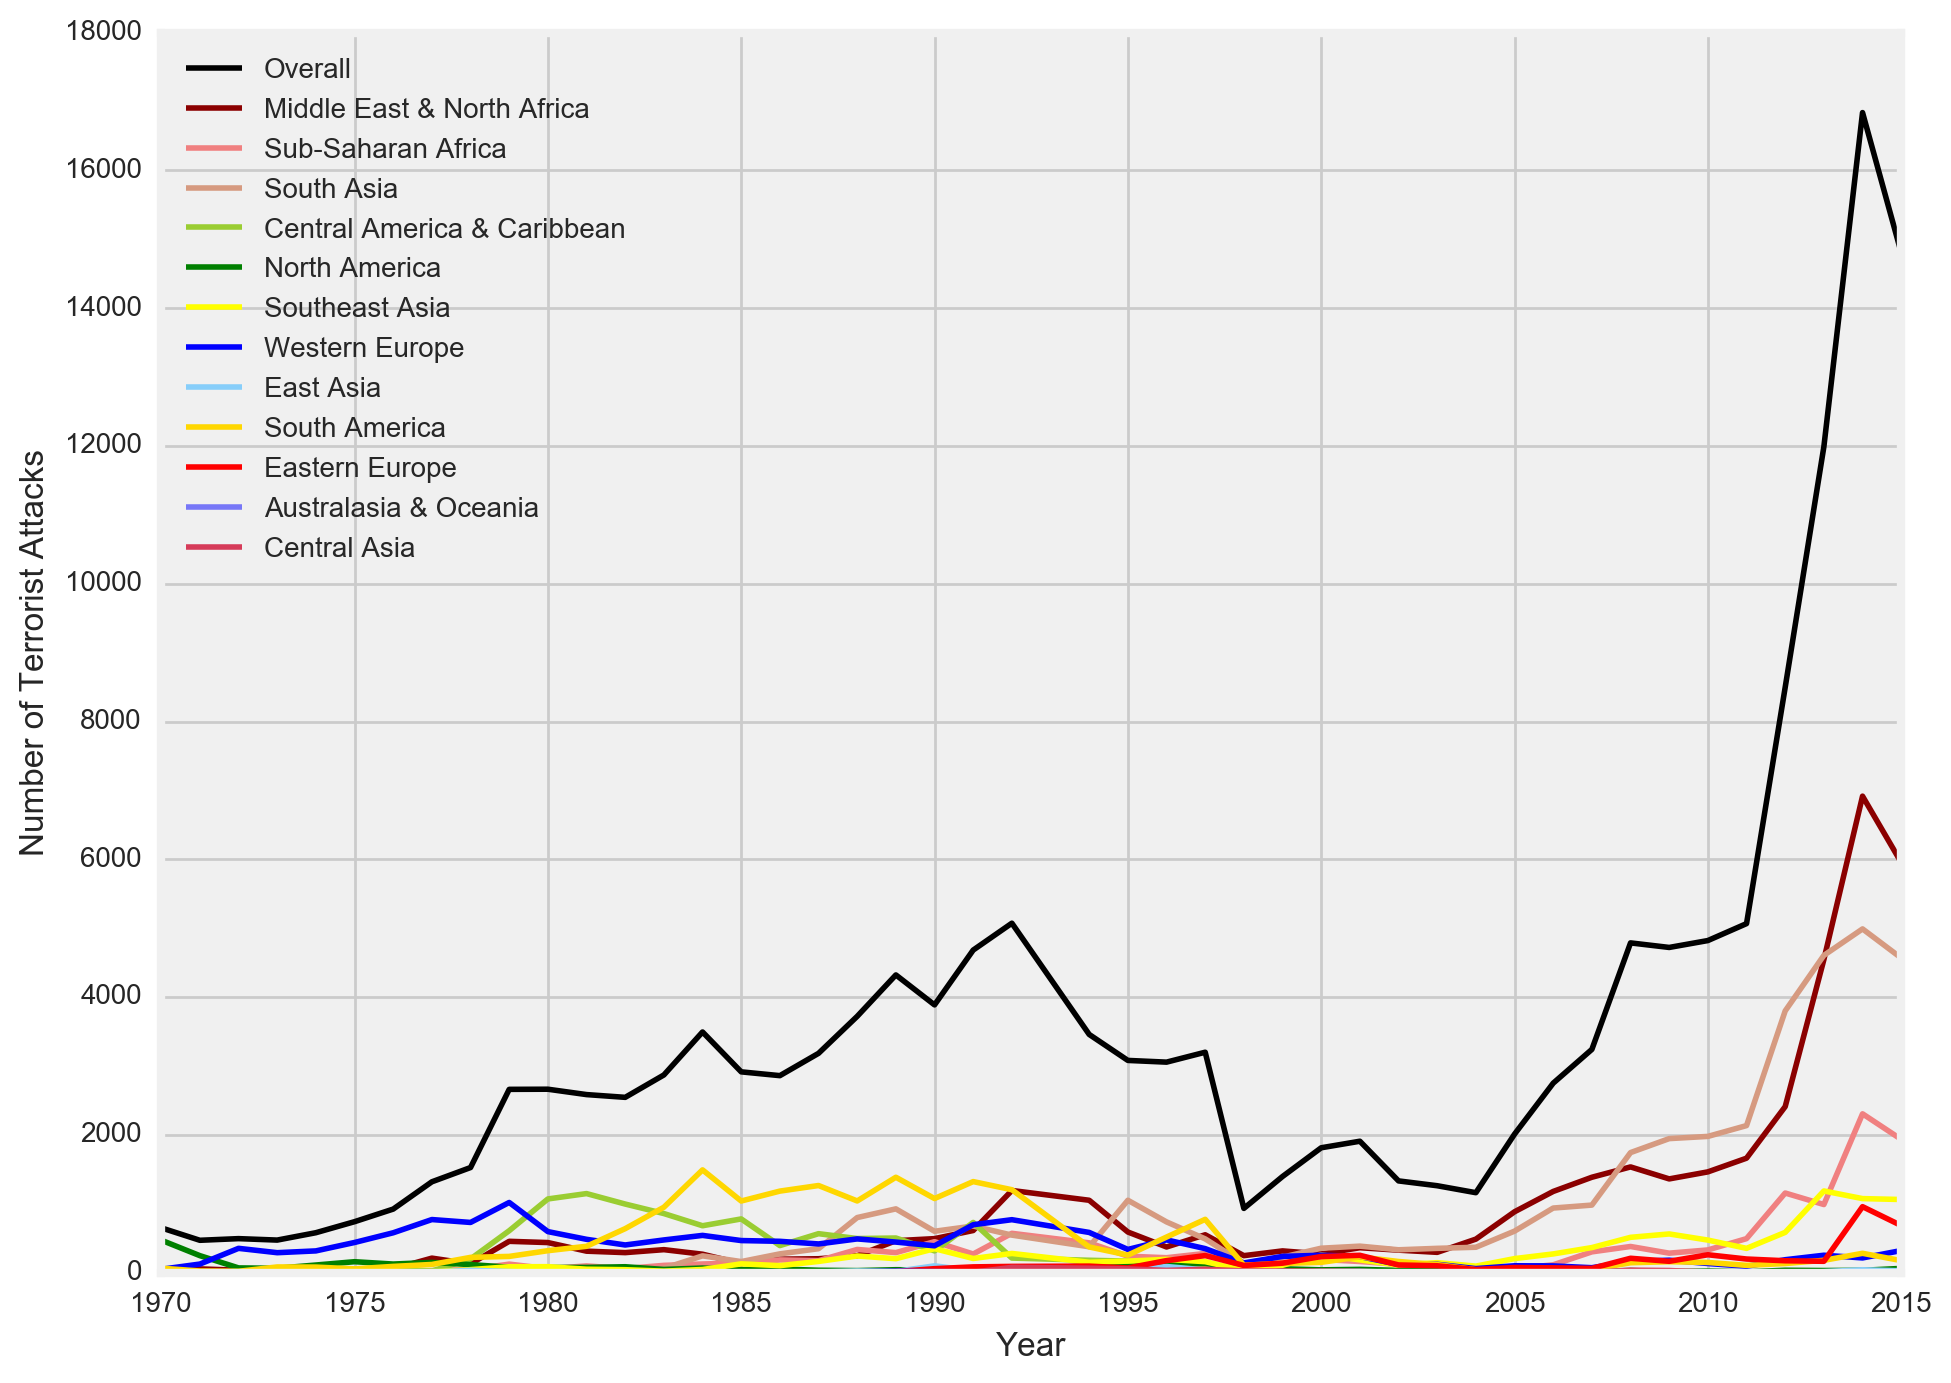

In [15]:
# Plotting the trends in total number of attacks and number of attacks in each region between 1970 t0 2015
fig = plt.figure(figsize=(10,8))
ax = fig.gca()
ax.plot(time2.iyear, time2.attacktype1_txt , lw=2, color='black', alpha=1.,
            label='Overall')  
ax.plot(time[time['region_txt']== 'Middle East & North Africa'].iyear, time[time['region_txt']== 'Middle East & North Africa'].attacktype1_txt , lw=2, color='darkred', alpha=1.,
            label='Middle East & North Africa')
ax.plot(time[time['region_txt']== 'Sub-Saharan Africa'].iyear, time[time['region_txt']== 'Sub-Saharan Africa'].attacktype1_txt , lw=2, color='lightcoral', alpha=1.,
            label='Sub-Saharan Africa')
ax.plot(time[time['region_txt']== 'South Asia'].iyear, time[time['region_txt']== 'South Asia'].attacktype1_txt , lw=2, color="#D69A80", alpha=1.0,
            label='South Asia')
ax.plot(time[time['region_txt']== 'Central America & Caribbean'].iyear, time[time['region_txt']== 'Central America & Caribbean'].attacktype1_txt , lw=2, color='yellowgreen', alpha=1.,
            label='Central America & Caribbean')    
ax.plot(time[time['region_txt']== 'North America'].iyear, time[time['region_txt']== 'North America'].attacktype1_txt , lw=2, color='green', alpha=1.,
            label='North America')
ax.plot(time[time['region_txt']== 'Southeast Asia'].iyear, time[time['region_txt']== 'Southeast Asia'].attacktype1_txt , lw=2, color='yellow', alpha=1.,
            label='Southeast Asia')
ax.plot(time[time['region_txt']== 'Western Europe'].iyear, time[time['region_txt']== 'Western Europe'].attacktype1_txt , lw=2, color='blue', alpha=1.,
            label='Western Europe')
ax.plot(time[time['region_txt']== 'East Asia'].iyear, time[time['region_txt']== 'East Asia'].attacktype1_txt , lw=2, color='lightskyblue', alpha=1.,
            label='East Asia')
ax.plot(time[time['region_txt']== 'South America'].iyear, time[time['region_txt']== 'South America'].attacktype1_txt , lw=2, color='gold', alpha=1.,
            label='South America')
ax.plot(time[time['region_txt']== 'Eastern Europe'].iyear, time[time['region_txt']== 'Eastern Europe'].attacktype1_txt , lw=2, color='red', alpha=1.,
            label='Eastern Europe')
ax.plot(time[time['region_txt']== 'Australasia & Oceania'].iyear, time[time['region_txt']== 'Australasia & Oceania'].attacktype1_txt , lw=2, color='blue', alpha=0.5,
            label='Australasia & Oceania')
ax.plot(time[time['region_txt']== 'Central Asia'].iyear, time[time['region_txt']== 'Central Asia'].attacktype1_txt , lw=2, color="#D63B59", alpha=1.0,
            label='Central Asia')

ax.set_xlabel('Year') 
ax.set_ylabel('Number of Terrorist Attacks')
ax.legend(loc='upper left')
plt.show()


In [45]:
# Creating subsets for the number of attacks for lebanon and West Bank
Lebanon =data[(data['country_txt']=='Lebanon')].groupby(['iyear'], as_index = False).attacktype1_txt.count()
WB =data[data['country_txt']=='West Bank and Gaza Strip'].groupby(['iyear'], as_index = False).attacktype1_txt.count()


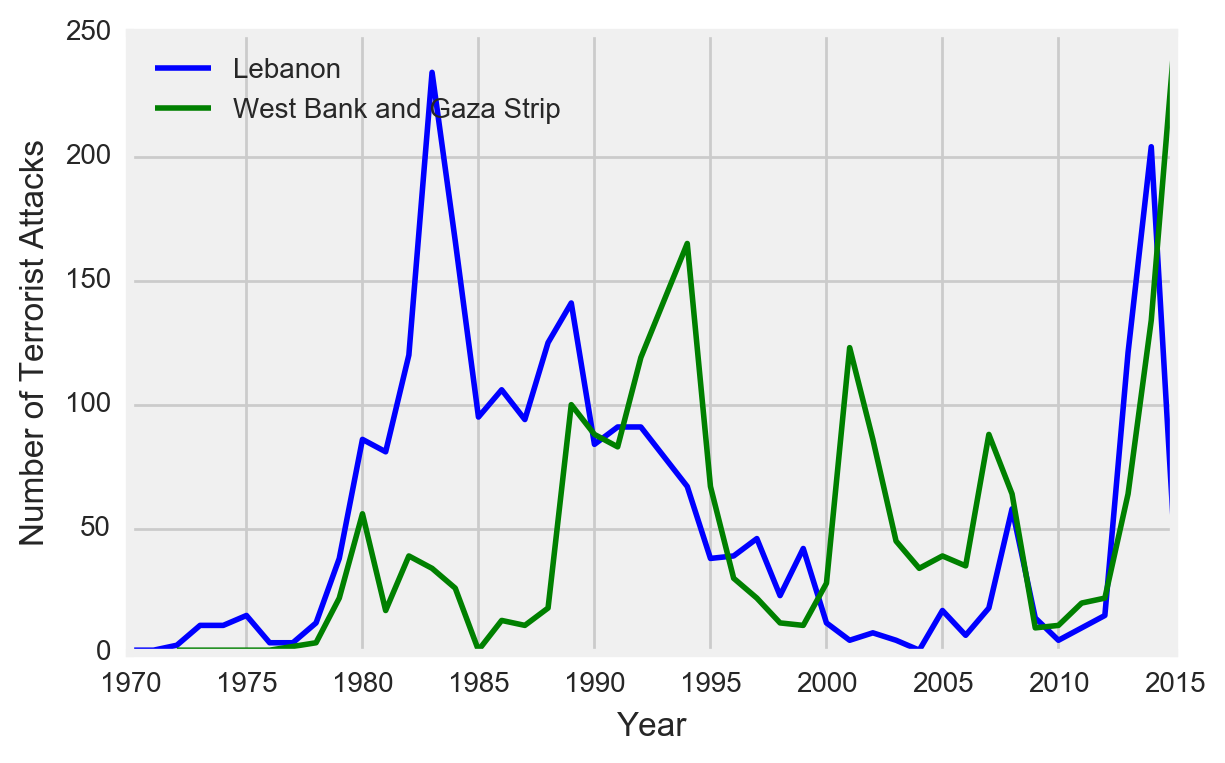

In [21]:
# Plotting the trends in total number of attacks in West bank and Lebanon between 1970 - 2015
fig = plt.figure(figsize=(6,4))
ax = fig.gca()

ax.plot(Lebanon.iyear, Lebanon.attacktype1_txt , lw=2, color="blue", alpha=1.0,
            label='Lebanon')
ax.plot(WB.iyear, WB.attacktype1_txt , lw=2, color="green", alpha=1.0,
            label='West Bank and Gaza Strip')

ax.set_xlabel('Year') 
ax.set_ylabel('Number of Terrorist Attacks')
ax.legend(loc='upper left')
plt.show()


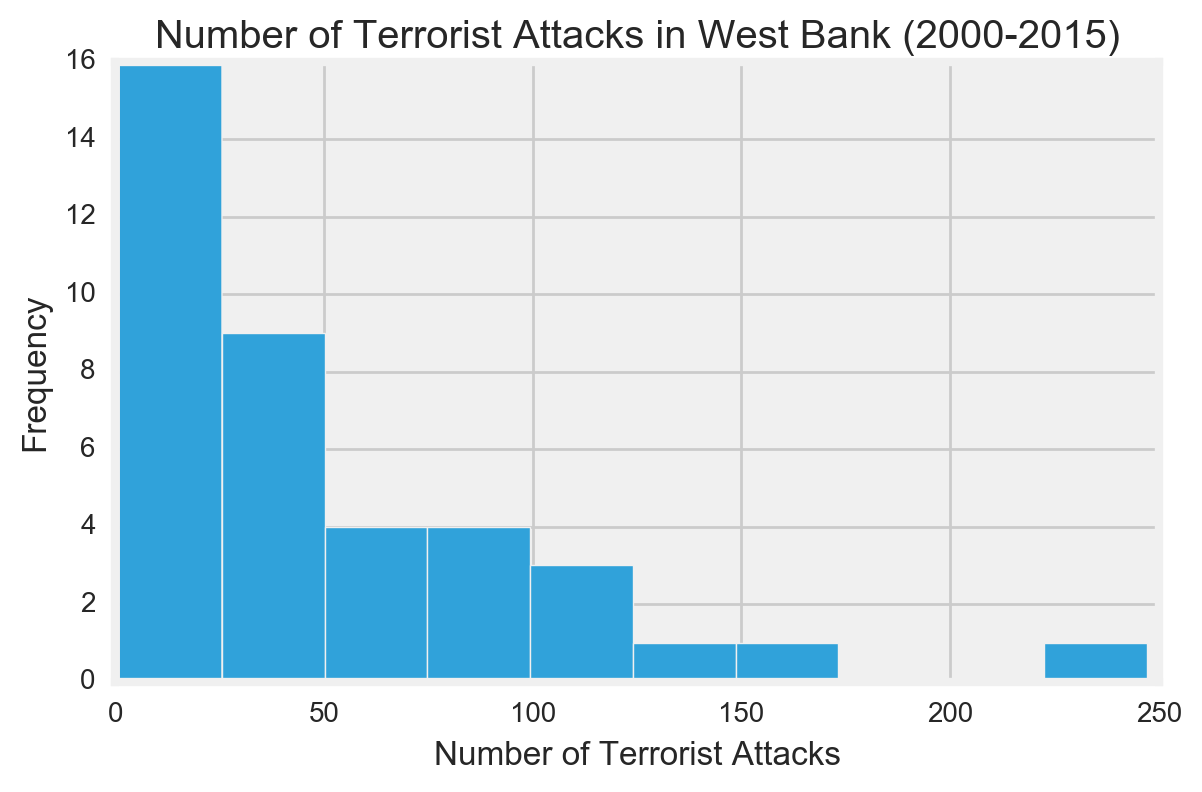

In [65]:
# Histogram of number of attacks in West Bank between 2000 - 2015
plt.hist(WB.attacktype1_txt)
plt.xlabel('Number of Terrorist Attacks') 
plt.ylabel('Frequency')
plt.title('Number of Terrorist Attacks in West Bank (2000-2015)')
plt.show()

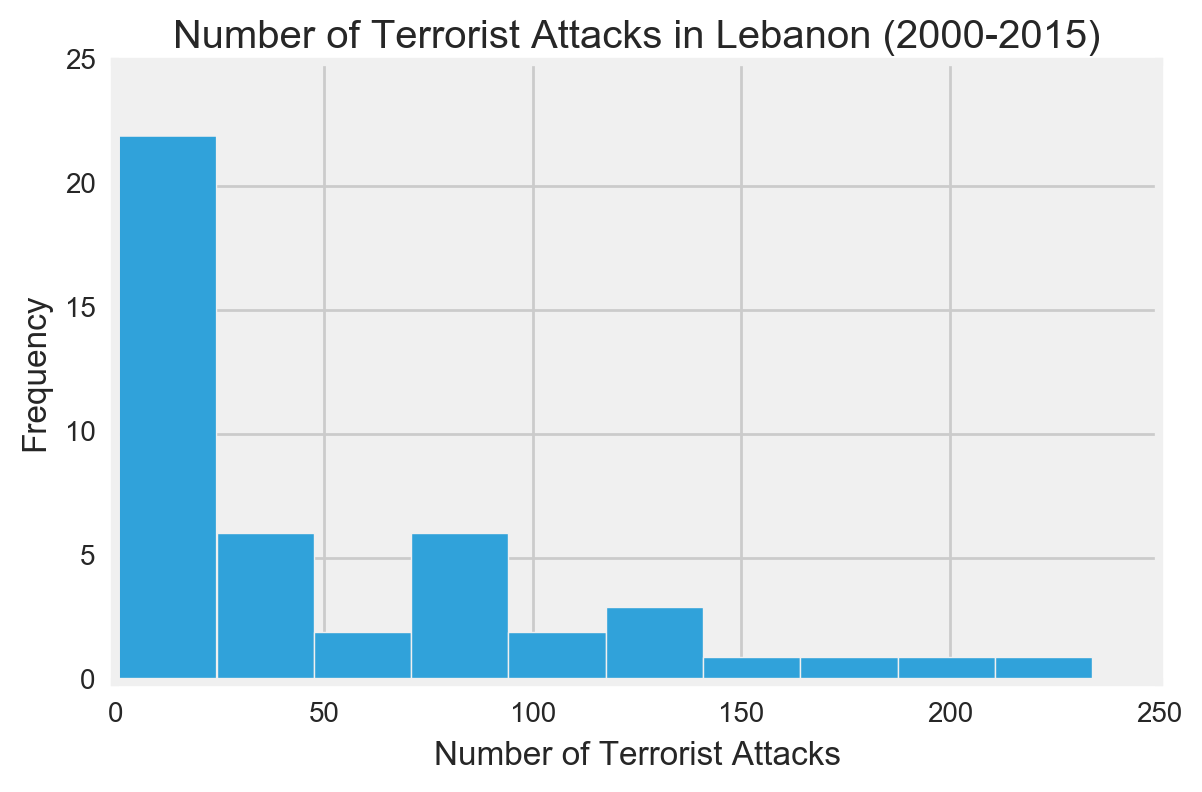

In [66]:
# Histogram of number of attacks in Lebanon between 2000 - 2015

plt.hist(Lebanon.attacktype1_txt)
plt.xlabel('Number of Terrorist Attacks') 
plt.ylabel('Frequency')
plt.title('Number of Terrorist Attacks in Lebanon (2000-2015)')

plt.show()

In [251]:
data[data['country_txt']=='Lebanon'].attacktype1_txt.value_counts()

Bombing/Explosion                      1500
Assassination                           341
Armed Assault                           322
Hostage Taking (Kidnapping)             177
Unknown                                  30
Hijacking                                18
Facility/Infrastructure Attack           15
Unarmed Assault                           7
Hostage Taking (Barricade Incident)       3
Name: attacktype1_txt, dtype: int64

## Comparing the terrorist attacks in West Bank and Lebanon/Bayesian Inference Approach

The Bayesian approach was taken to investigate whether the number of terror attacks happened in Lebanon and West Bank during years 2000 - 2015 are significantly different from each other or they are following a same distribution. The prior distribution was chosen to have a gamma distribution. Uniform distribution was assumed for the mean and standard deviation of prior. The mean and standard deviation of the data from years 1970 to 2000 for these two countries  were set as the prior’s mean and standard deviation upper limit and zero as their  lower limits. 

#Assuming having prior of Gamma distribution and posterior Poisson Distribiution

In [34]:
#  The available data from 2000 - 2015 is used as likelihood 
# likelihood
attacksWB = data[(data['country_txt']=='West Bank and Gaza Strip') &(data['iyear']>2000) ].groupby(['iyear']).attacktype1_txt.count().values
attacksLebanon = data[(data['country_txt']=='Lebanon') &(data['iyear']>2000) ].groupby(['iyear']).attacktype1_txt.count().values


In [35]:
#Using the data from 1970 to 2000 to calculate the mean and std of prior needs two parameters mean, std

mean_prior_mean = data[(data['region_txt']=='Middle East & North Africa')&(data['iyear'] <2000)].groupby(['iyear']).attacktype1_txt.count().mean()
mean_prior_std = data[(data['region_txt']=='Middle East & North Africa')&(data['iyear']<2000)].groupby(['iyear']).attacktype1_txt.count().std()

In [37]:
#Assuming uniform distribution for the mean of the prior
mean_prior_lower = 0.01
mean_prior_upper = 285.0 # The upper limit is chosen based on the mean number of terror attacks in Middle East & North Africa in 1970 t0 2000

with pm.Model() as model:

    attacksWB_mean = pm.Uniform('attacksWB_mean', lower=mean_prior_lower, upper=mean_prior_upper)
    attacksLebanon_mean = pm.Uniform('attacksLebanon_mean', lower=mean_prior_lower, upper=mean_prior_upper)

In [38]:
#Assuming uniform distribution for the std of the prior
std_prior_lower = 0.01
std_prior_upper = 300.0 # The upper limit is chosen based on the std of terror attacks in Middle East & North Africa in 1970 t0 2000


with model:
    
    attacksWB_std = pm.Uniform('attacksWB_std', lower=std_prior_lower, upper=std_prior_upper)
    attacksLebanon_std = pm.Uniform('attacksLebanon_std', lower=std_prior_lower, upper=std_prior_upper)


In [39]:
# Assigning Gamma distribution for the prior with the uniform mean and standard deviation already defined
with model:

    attacks_WB = pm.Gamma('attacks_WB', mu=attacksWB_mean, sd=attacksWB_std,  observed=attacksWB)
    attacks_Lebanon = pm.Gamma('attacks_Lebanon', mu=attacksLebanon_mean,  sd=attacksLebanon_std, observed=attacksLebanon)

In [40]:
# Defining difference of means and difference of standard deviations and effect size
with model:

    diff_of_means = pm.Deterministic('difference of means', attacksWB_mean - attacksLebanon_mean)
    diff_of_stds = pm.Deterministic('difference of stds', attacksWB_std - attacksLebanon_std)
    effect_size = pm.Deterministic('effect size',
                                   diff_of_means / np.sqrt((attacksWB_std**2 + attacksLebanon_std**2) / 2))

In [41]:
# Running the model to get the posterior
with model:
    trace = pm.sample(10000, njobs=4)


Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -156.22: 100%|██████████| 200000/200000 [01:05<00:00, 3059.05it/s]
Finished [100%]: Average ELBO = -156.17
100%|██████████| 10000/10000 [06:01<00:00, 27.68it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x13c06fd10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x12fc7bb50>], dtype=object)

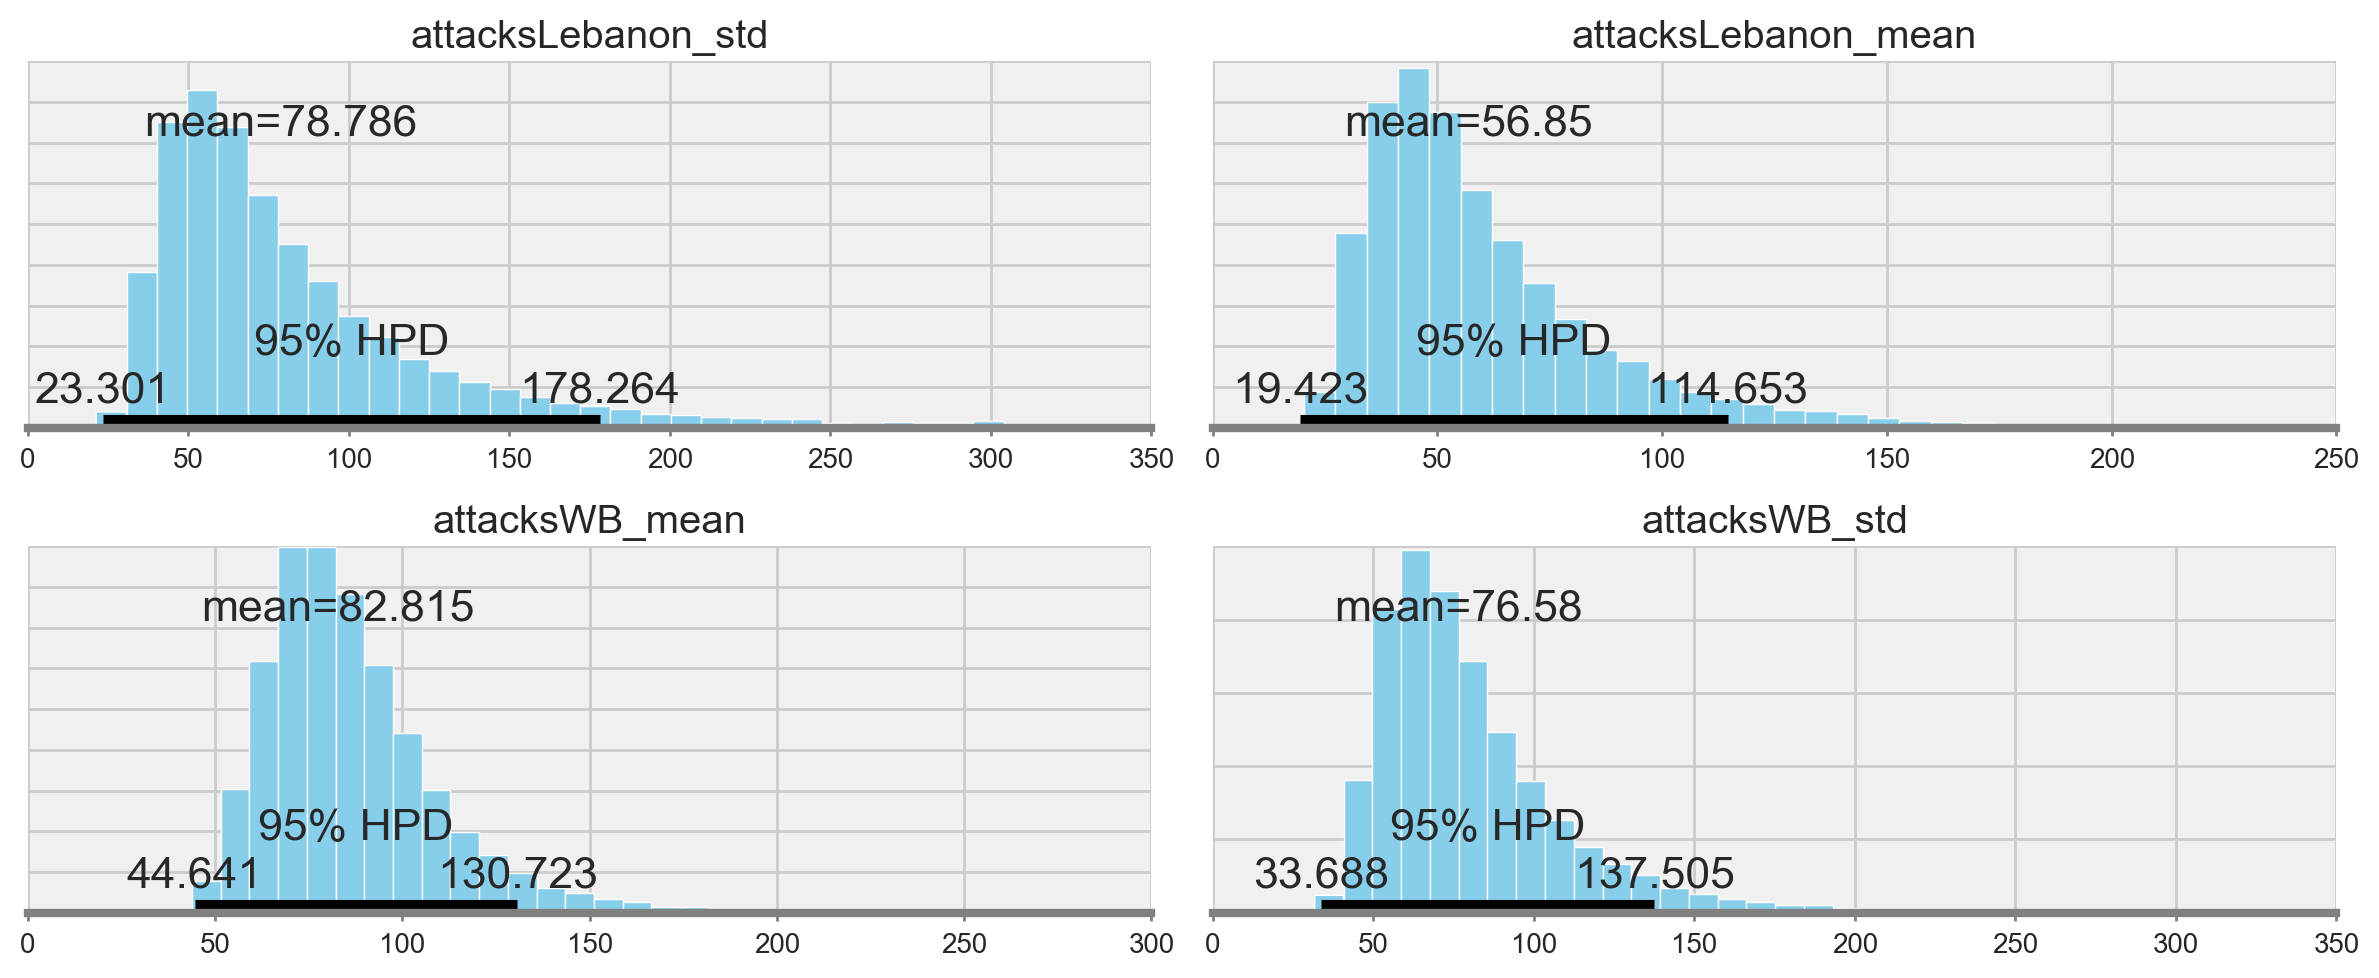

In [43]:
#Plotting the results for the posterior distributions
pm.plot_posterior(trace[3000:],
                  varnames=['attacksWB_mean', 'attacksLebanon_mean', 'attacksWB_std', 'attacksLebanon_std'],
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x129d6c490>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x13ce35a90>], dtype=object)

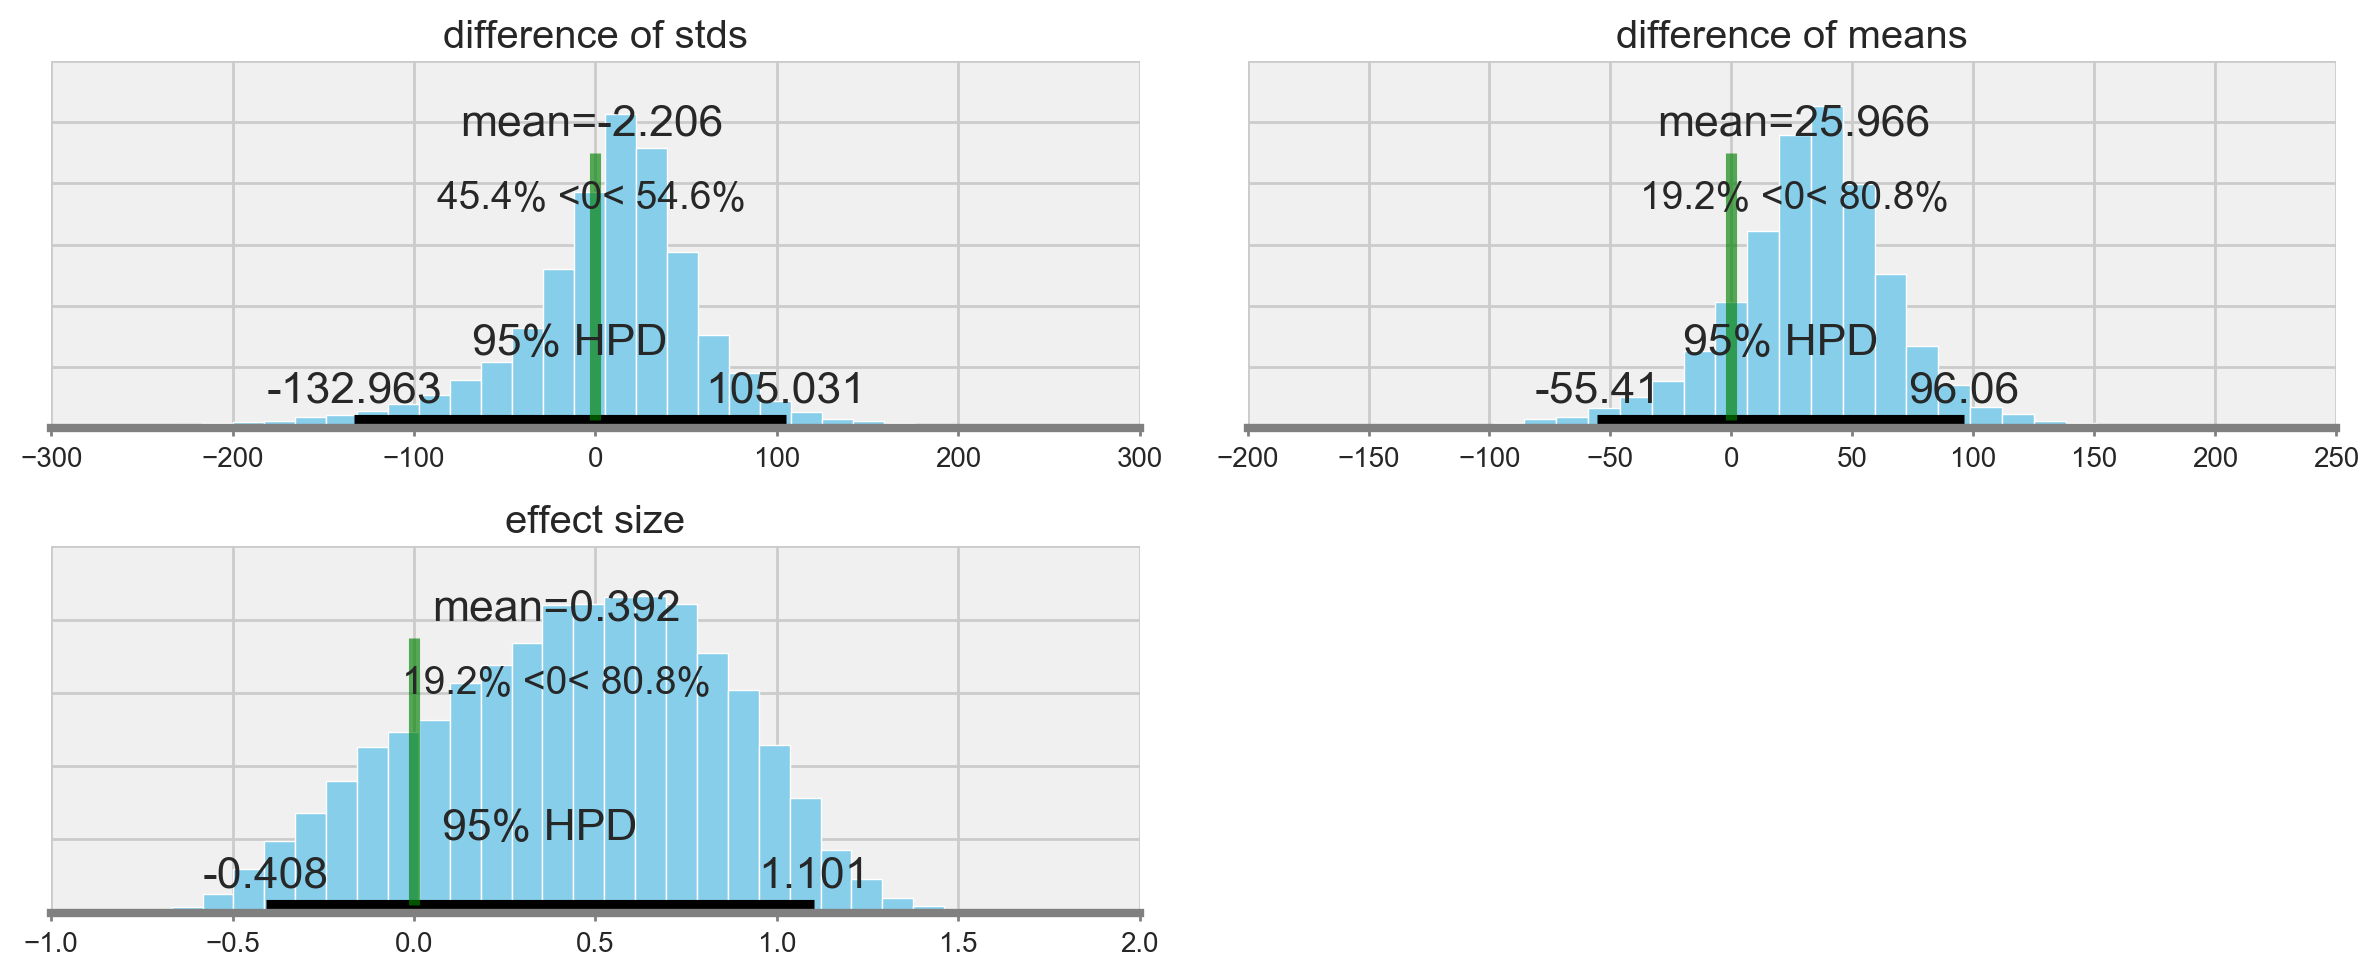

In [44]:
# Plotting difference of means and difference of standard deviations and effect size 
pm.plot_posterior(trace[3000:],
                  varnames=['difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

In [442]:
# Summary of the model
pm.summary(trace[3000:],
           varnames=['difference of means', 'difference of stds', 'effect size'])


difference of means:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  32.655           2.608            0.015            [27.610, 37.863]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  27.526         30.893         32.677         34.423         37.789


difference of stds:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  -0.928           122.147          0.705            [-234.755, 229.335]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -233.891       -89.171        0.243          86.691         231.060


effect size:

  Mean             SD               MC Error         9

The results for the number of terror attacks in Lebanon and West Bank during years 2000-2015 showed they are not statistically different. Lebanon has an average of 57 attacks with standard deviation of 79. West Bank has the average of 77 attacks with standard deviation of 83. However, since the 95% credible intervals for West Bank includes the mean value of Lebanon and also the difference of mean includes zero, the two distributions are not significantly different.

## Predicting the bombing/explosion attacks in Lebanon in 1993
In terms of predicting the bombing attacks in 1993 in Lebanon, it was assumed that the number of bombing attacks is linearly related to the year meaning: 
Number of bombing in Lebanon =B0 +B1 * (year-1970)
Assuming uniform distribution for B0 (intercept) and Normal distribution for B1, the data from bombing attacks in Lebanon from 1970-2015 except for 1993 where the data was missing was used in the analysis. Poisson distribution was chosen as the prior distribution.

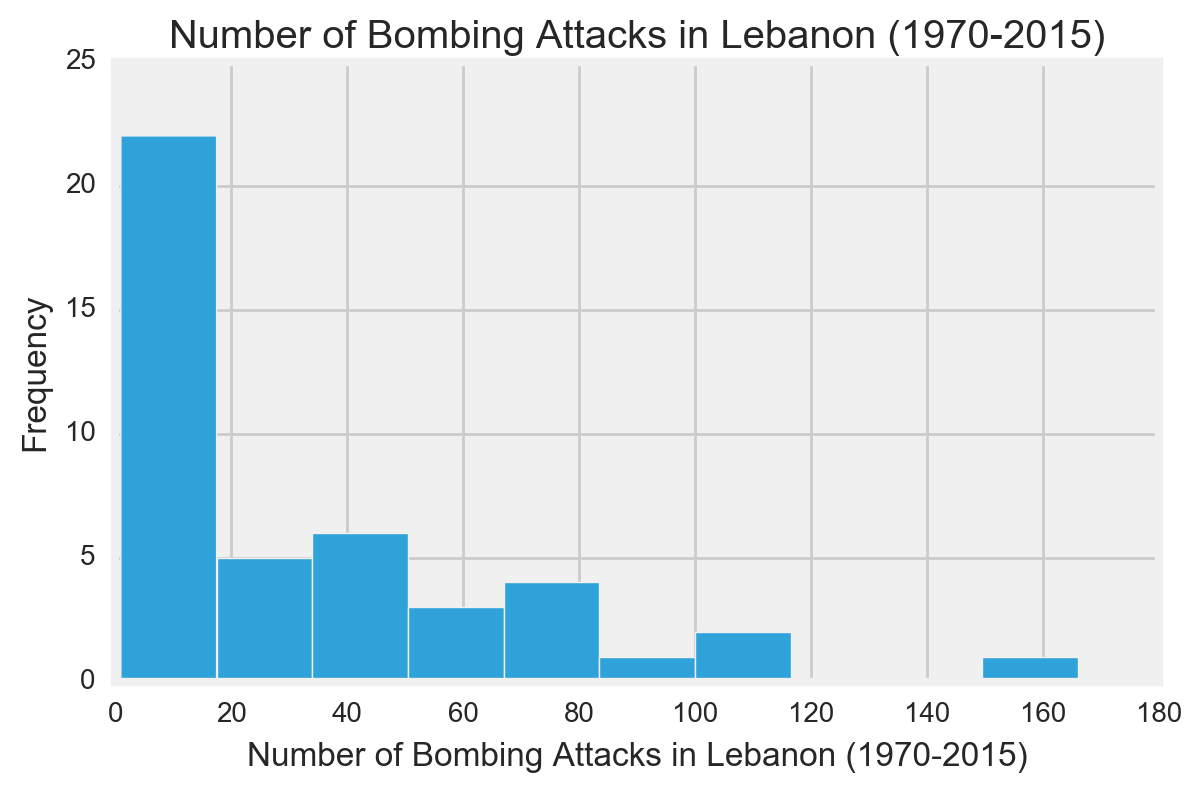

In [78]:
#Plotting the likelihood or data
data[(data['country_txt']=='Lebanon') & (data['attacktype1_txt']=='Bombing/Explosion')].groupby('iyear').attacktype1_txt.count().hist()
plt.xlabel('Number of Bombing Attacks in Lebanon (1970-2015)') 
plt.ylabel('Frequency')
plt.title('Number of Bombing Attacks in Lebanon (1970-2015)')

plt.show()

In [573]:
#Calculating the mean of bombing attacks in Lebanon in 1970 - 2015
mean_prior_mean=data[(data['country_txt']=='Lebanon') & (data['attacktype1_txt']=='Bombing/Explosion')].groupby('iyear').attacktype1_txt.count().mean()

print mean_prior_mean

34.09090909090909

In [572]:
#Assigning the likelihood or observed data
attacksBLebanon=data[(data['country_txt']=='Lebanon') & (data['attacktype1_txt']=='Bombing/Explosion')].groupby('iyear').attacktype1_txt.count().values


In [69]:
#Calculating the mean for prior
mean_prior_mean=data[(data['country_txt']=='Lebanon') & (data['attacktype1_txt']=='Bombing/Explosion')].groupby('iyear').attacktype1_txt.count().mean()
#Assigning the likelihood or observed data
attacksBLebanon=data[(data['country_txt']=='Lebanon') & (data['attacktype1_txt']=='Bombing/Explosion')].groupby('iyear').attacktype1_txt.count().values



In [57]:
#Using all other years to perform bayesian regression, assuming uniform distribution for intercept (B0) and normal 
# distribution for beta _year (B1) coefficient
dataframe =data[(data['country_txt']=='Lebanon') & (data['attacktype1_txt']=='Bombing/Explosion')].groupby('iyear', as_index= False).attacktype1_txt.count()
X = dataframe.iyear.unique()

with pm.Model() as model:       
    intercept = pm.Uniform('intercept', lower=0, upper=250)
    beta_year = pm.Normal('beta_year', mu=0, sd=100)
    
    mu = tt.exp(intercept ) 
    
    y_est = pm.Poisson('y_est', mu=intercept + beta_year * (X - 1970), observed=attacksBLebanon)
    
    start = pm.find_MAP()
    step = pm.Metropolis()
    trace = pm.sample(10000, step, start=start, progressbar=True)
 

         Current function value: 1189.331134
         Iterations: 1
         Function evaluations: 17
         Gradient evaluations: 6


100%|██████████| 10000/10000 [00:04<00:00, 2069.35it/s]


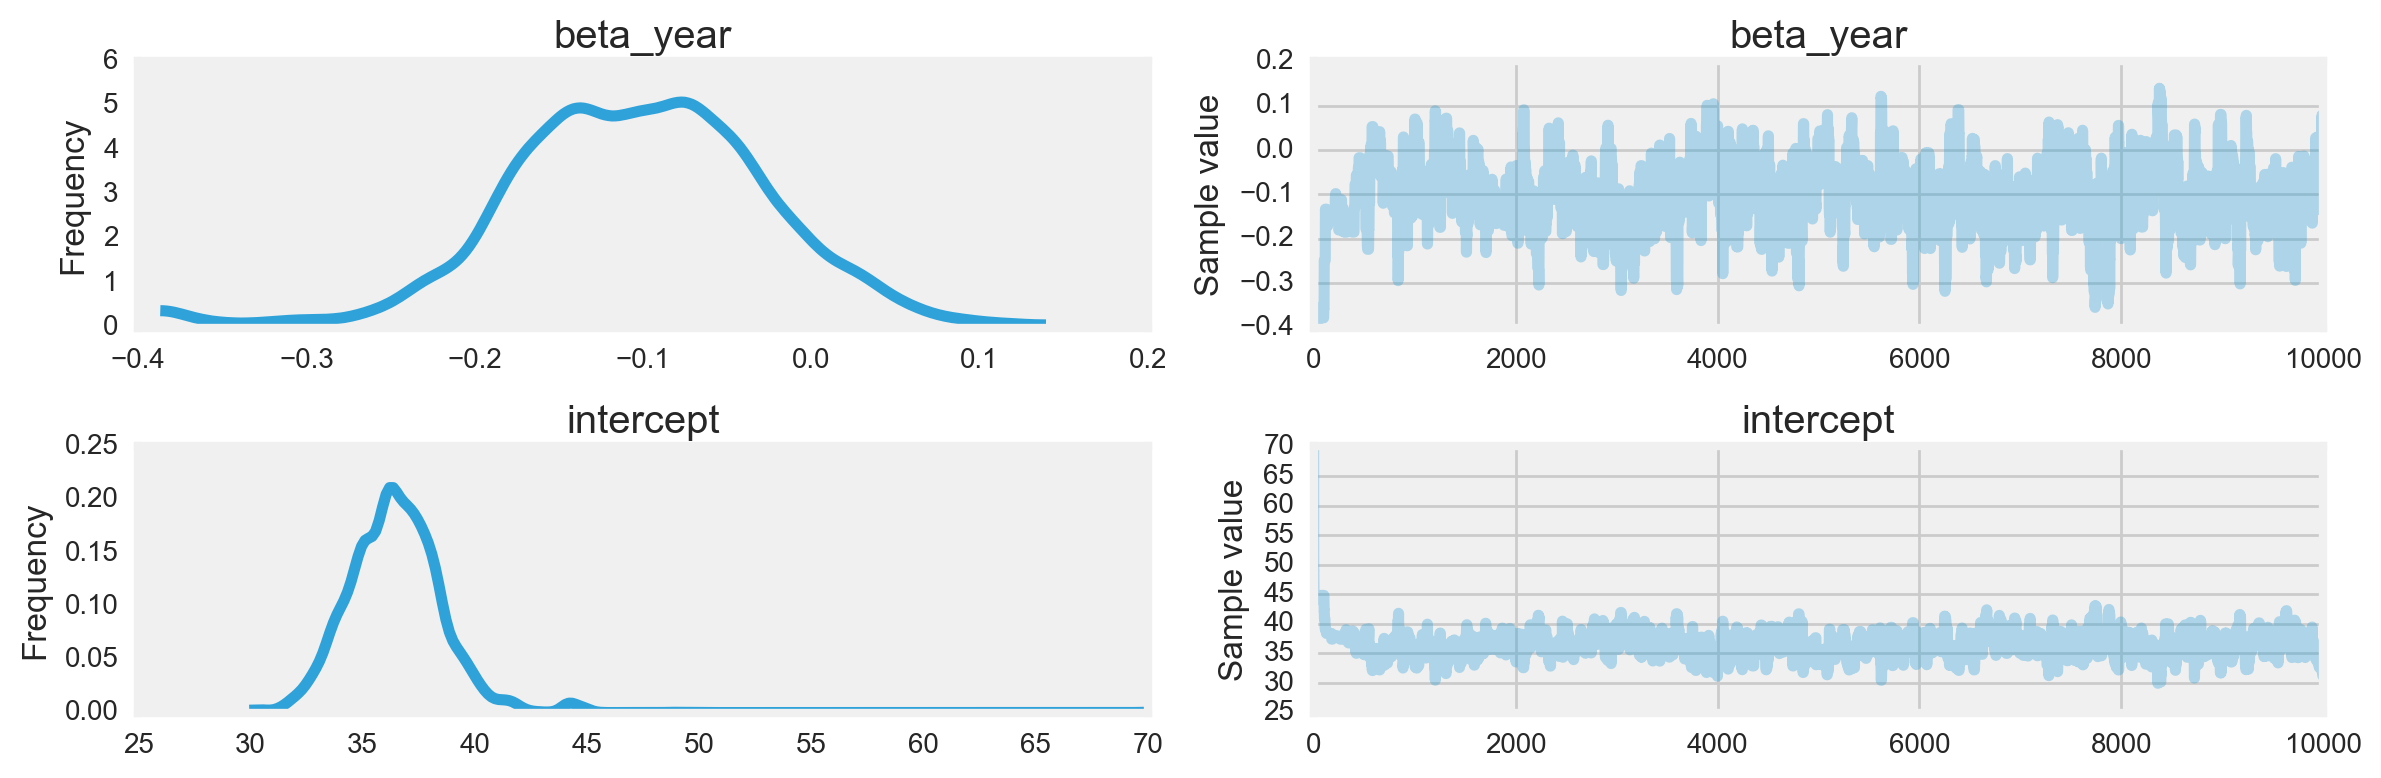

In [58]:
_ = pm.traceplot(trace)

In [59]:
# Getting the predicted posterior distribution of predicted values of number of bombing attacks in Lebanon in 1993 
y_1993 = np.random.poisson((trace['intercept'] + trace['beta_year'] * 23) , 10000)

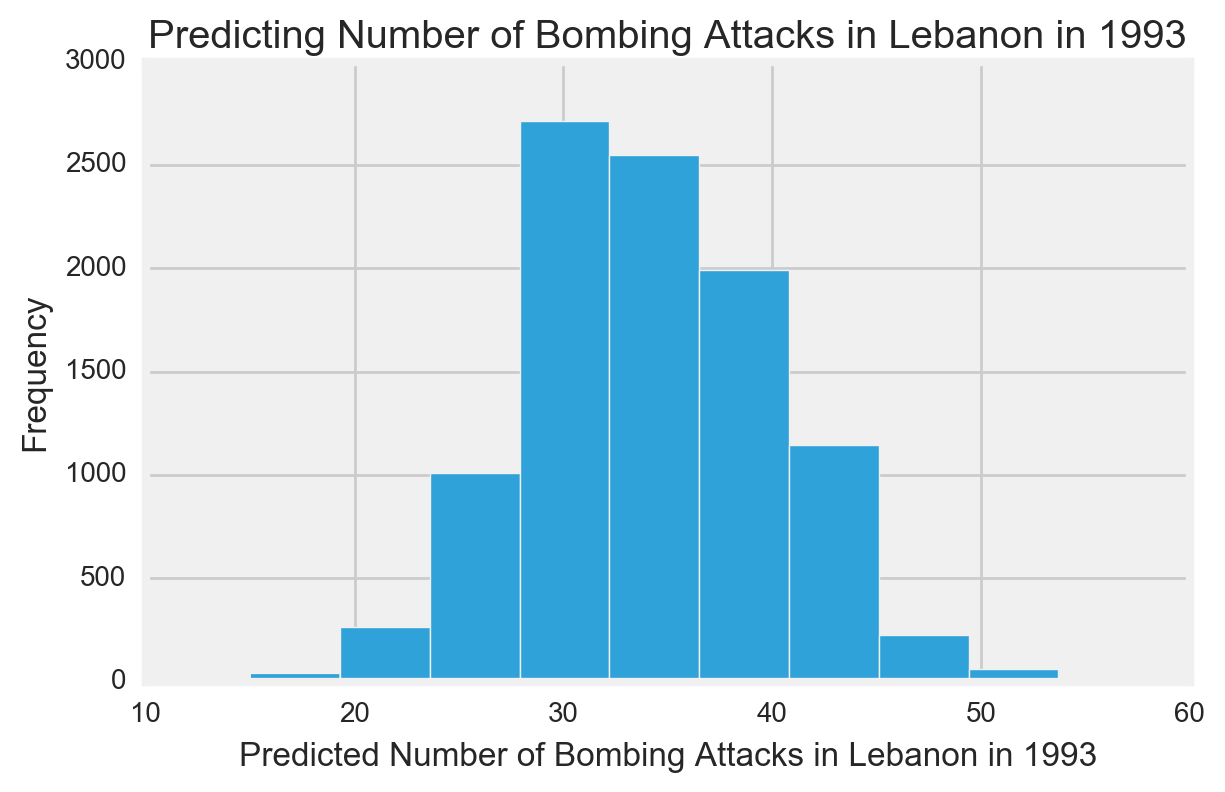

In [67]:
#Plotting the number of bombing attacks in Lebanon in 1993
plt.hist(y_1993)
plt.xlabel('Predicted Number of Bombing Attacks in Lebanon in 1993') 
plt.ylabel('Frequency')
plt.title('Predicting Number of Bombing Attacks in Lebanon in 1993')
plt.show()

In [76]:
# The median of the posterior distribution of the number of bombing attacks in Lebanon in 1993 
np.median(y_1993)



34.0

The bayesian regression resulted in very small B1 indicating the year does not linearly correlated with the number of bombing attacks in Lebanon and the intercept value which is a constant value takes the value of the average of bombings during the timeframe.
The result of the prediction of bombing attacks in Lebanon in 1993 is basically the mean of the values of bombings in Lebanon between 1970-2015.